In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest , RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [158]:
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [160]:
df.fillna(df.mean(), inplace=True)

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [162]:
df.nunique()

,0
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


<Axes: >

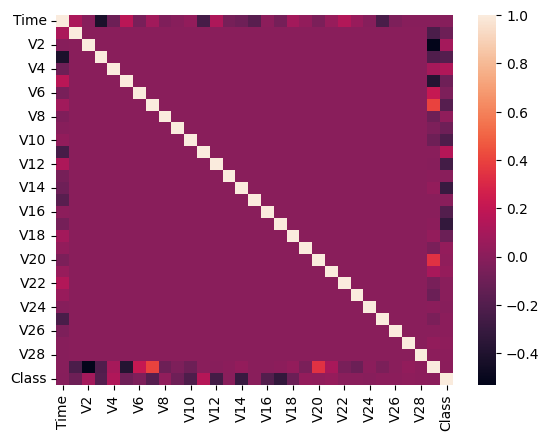

In [163]:
sns.heatmap(df.corr())

In [164]:
scaler = RobustScaler()
df1 = scaler.fit_transform(df)
df1 = pd.DataFrame(df1, columns=df.columns)
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0.0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0.0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0.0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0.0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-5.321622,7.135767,-5.222589,-1.285699,-4.073679,-1.999082,-4.409307,13.588260,1.585066,...,0.585633,0.098124,3.314091,-0.693006,2.126512,0.532055,5.820867,6.190862,-0.296653,0.0
284803,1.034963,-0.335820,-0.085979,0.967471,-0.451476,0.707747,1.142041,-0.014027,0.508439,0.512990,...,0.587444,0.856848,0.076436,-1.331299,-0.933155,-0.604145,0.414680,-0.493534,0.038986,0.0
284804,1.034975,0.850377,-0.261532,-1.788463,-0.337932,2.059687,2.832770,-0.299623,1.280019,0.390154,...,0.630455,0.533612,-0.085005,0.754500,0.373060,-0.062034,0.019227,-0.288058,0.641096,0.0
284805,1.034975,-0.115629,0.331602,0.272567,0.445763,-0.248270,0.769496,-0.645865,1.225405,0.357606,...,0.710499,0.740745,-0.491472,0.103549,-0.877058,1.054357,0.663921,0.710829,-0.167680,0.0


#**MODELLING**

In [165]:
X = df1.drop(['Class'],axis=1)
y = df1['Class']

In [166]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)#, stratify=y)

In [167]:
model = IsolationForest()
model2 = XGBClassifier()
model3 = RandomForestClassifier()

In [168]:
model.fit(X_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

RandomForestClassifier()

In [169]:
IF = model.predict(X_test)
XGB = model2.predict(X_test)
RF = model3.predict(X_test)


0.0002984445770864787


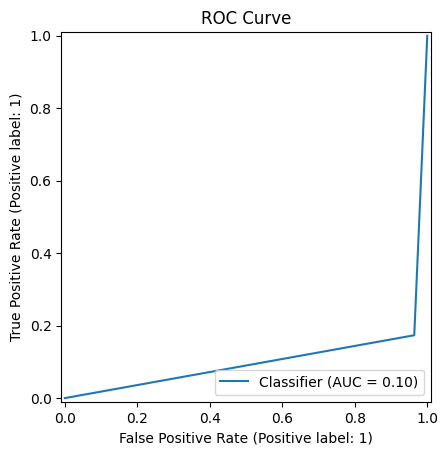

In [170]:
print(accuracy_score(y_test,IF))

RocCurveDisplay.from_predictions(y_test, IF)
plt.title("ROC Curve")
plt.show()

0.9995611109160493


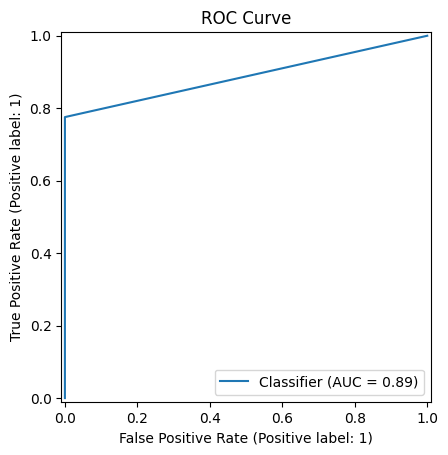

In [171]:
print(accuracy_score(y_test,XGB))

RocCurveDisplay.from_predictions(y_test, XGB)
plt.title("ROC Curve")
plt.show()

0.9995611109160493


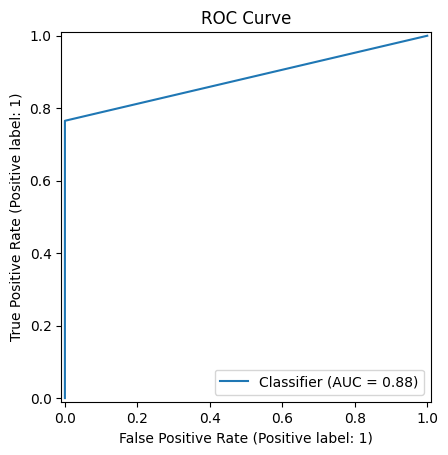

In [172]:
print(accuracy_score(y_test,RF))

RocCurveDisplay.from_predictions(y_test, RF)
plt.title("ROC Curve")
plt.show()

In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

Undersampling

In [174]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification

In [175]:
df1_undersample = df1.copy()
X = df1_undersample.drop(['Class'],axis=1)
y = df1_undersample['Class']

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98     71079
         1.0       0.03      0.91      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.93      0.52     71202
weighted avg       1.00      0.95      0.97     71202



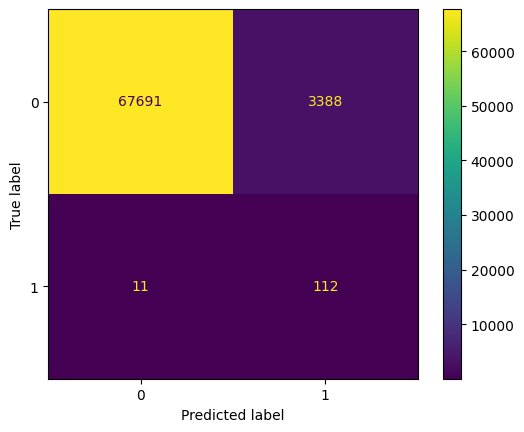

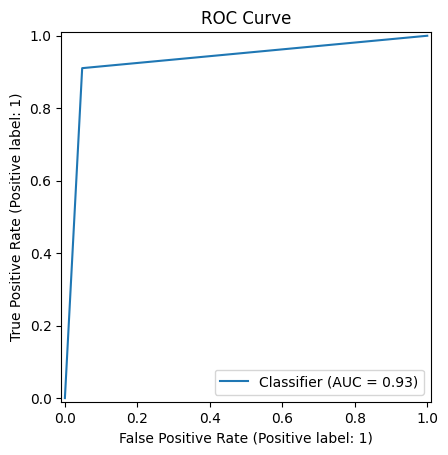

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

pipeline = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', XGBClassifier())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve")
plt.show()

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     71079
         1.0       0.06      0.89      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



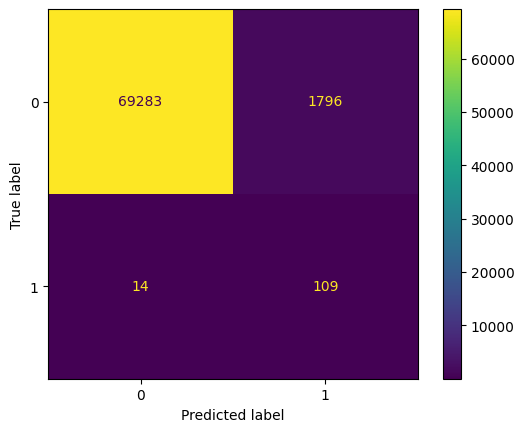

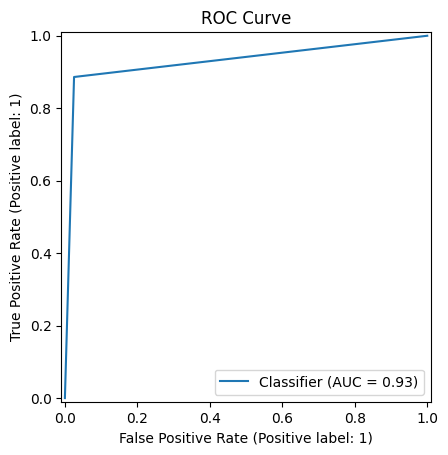

In [177]:
pipeline2 = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier())
])

pipeline2.fit(X_train, y_train)
y_pred = pipeline2.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve")
plt.show()

Oversampling

In [178]:
from imblearn.over_sampling import SMOTE

In [179]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000     71079
         1.0      0.863     0.821     0.842       123

    accuracy                          0.999     71202
   macro avg      0.931     0.910     0.921     71202
weighted avg      0.999     0.999     0.999     71202



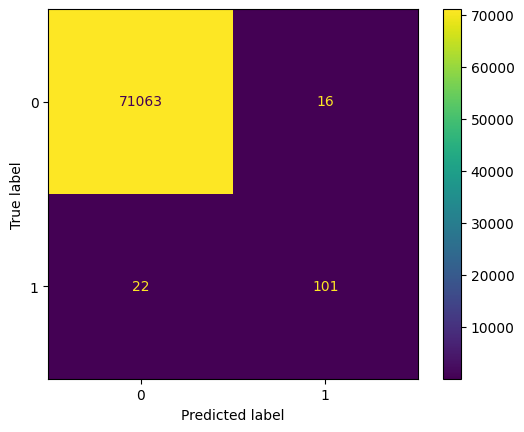

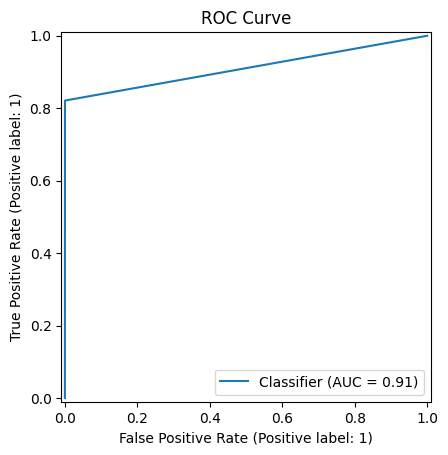

In [182]:
RF_smote = RandomForestClassifier(random_state=42)
RF_smote.fit(X_resampled, y_resampled)
y_pred = RF_smote.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve")
plt.show()

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000     71079
         1.0      0.765     0.846     0.803       123

    accuracy                          0.999     71202
   macro avg      0.882     0.923     0.901     71202
weighted avg      0.999     0.999     0.999     71202



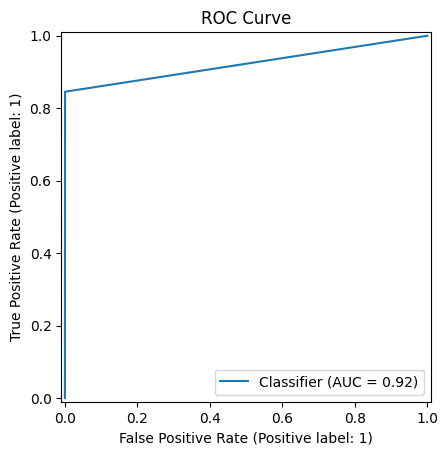

In [181]:
xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_resampled, y_resampled)
y_pred = xgb_smote.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve")
plt.show()